In [205]:
import numpy                       
from matplotlib import pyplot    
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16


In [206]:
Vm = 80
L = 11.
rhom = 250
nx = 51
dt = 0.001

In [207]:
dx = L/(nx-1)
A = Vm/rhom
x = numpy.linspace(0,L,nx)
rho0 = numpy.ones(nx)*10
rho0[10:20] = 50


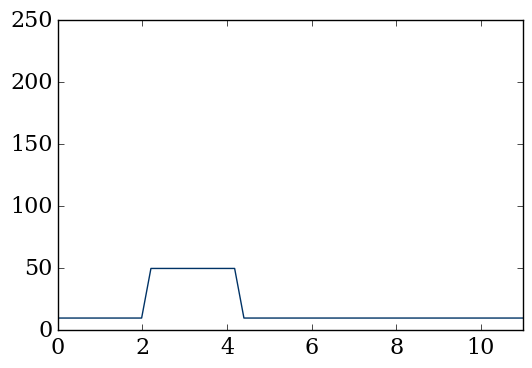

In [208]:
pyplot.plot(x, rho0, color='#003366', ls='-', lw=1)
pyplot.ylim(0,250);
pyplot.xlim(0,11);

In [209]:
#rho = rho0.copy()

In [210]:
def traffic(nt,rho,rho0,condition):
    rho = rho0.copy()
    for n in range(nt): 
        rhon = rho.copy()
        F = Vm*rho.copy()*(1-rho.copy()/rhom)
        rho[1:] = rhon[1:]-dt/dx*(F[1:]-F[:-1])
        rho[0] = condition
        
    return rho

La fonction principale est terminée, testons la avec des temps t=0, t=3minutes et t=6 minutes. Ce qui correspond à des intervalles nt=0, nt=50 et nt=100

In [211]:
rho = traffic(50,rho,rho0,10)

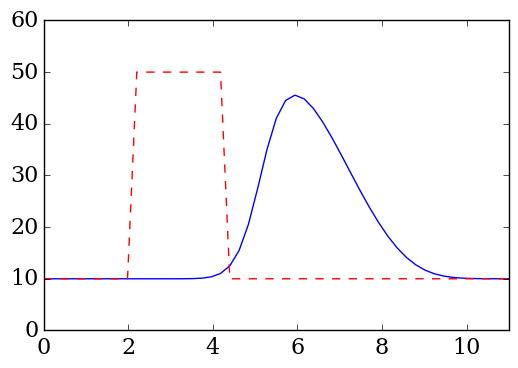

In [212]:
pyplot.plot(x, rho, color='b', ls='-', lw=1)
pyplot.plot(x, rho0, color='r', ls='--', lw=1)
pyplot.ylim(0,60);
pyplot.xlim(0,11);

In [213]:
V = Vm*(1-rho0.copy()/rhom)

In [214]:
min(V)/3.6

17.777777777777779

In [215]:
V = Vm*(1-rho.copy()/rhom)

In [216]:
len(V)

51

In [217]:
numpy.mean(V)/3.6

20.63616619610503

In [218]:
rho = traffic(100,rho,rho0,10)

In [219]:
V = Vm*(1-rho.copy()/rhom)

In [220]:
min(V)/3.6

18.784716870896442

# Partie 2

In [221]:
Vm = 136

In [222]:
x = numpy.linspace(0,L,nx)
rho0 = numpy.ones(nx)*20
rho0[10:20] = 50

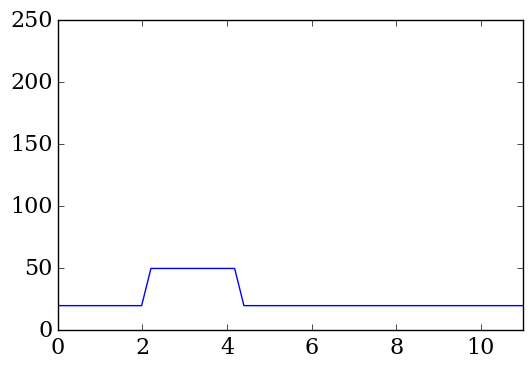

In [223]:
pyplot.plot(x, rho0, color='b', ls='-', lw=1)
pyplot.ylim(0,250);
pyplot.xlim(0,11);

In [224]:
V = Vm*(1-rho0.copy()/rhom)

In [225]:
min(V/3.6)

30.222222222222225

In [226]:
#rho = rho0.copy()

In [228]:
rho = traffic(50,rho,rho0,20)

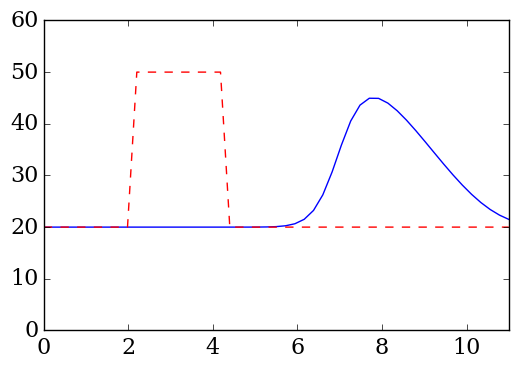

In [230]:
pyplot.plot(x, rho, color='b', ls='-', lw=1)
pyplot.plot(x, rho0, color='r', ls='--', lw=1)
pyplot.ylim(0,60);
pyplot.xlim(0,11);

In [231]:
V = Vm*(1-rho.copy()/rhom)

In [232]:
numpy.mean(V)/3.6

33.872218190977073

In [233]:
min(V/3.6)

30.986402680569721

# Partie 3 (Bonus)

In [235]:
from matplotlib import animation
from IPython.display import HTML

In [237]:
def diffusion(i):
    line.set_data(x,rho)
    rhon = rho.copy()
    F = Vm*rho.copy()*(1-rho.copy()/rhom)
    rho[1:] = rhon[1:]-dt/dx*(F[1:]-F[:-1])
    rho[0] = 20

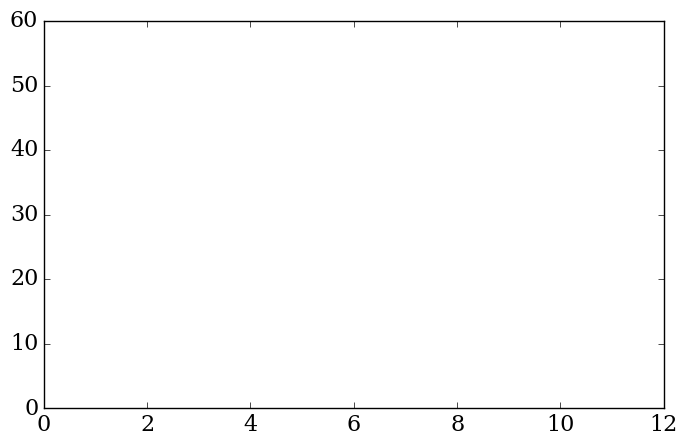

In [243]:
fig = pyplot.figure(figsize=(8,5))
ax = pyplot.axes(xlim=(0,12), ylim=(0,60))
line = ax.plot([], [], color='red', ls='--', lw=1)[0]

In [250]:
rho = rho0.copy()

In [251]:
anim = animation.FuncAnimation(fig, diffusion, frames=50, interval=100)

In [252]:
HTML(anim.to_html5_video())

In [247]:
rho = rho0.copy()

In [248]:
anim = animation.FuncAnimation(fig, diffusion, frames=100, interval=100)

In [249]:
HTML(anim.to_html5_video())